# Бинарный классификатор

## Описание датасета

Согласно варианту в ходе работы используем датасет [«Оценка вероятности диагностики диабета у человека»](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset). В исходном датасете 3 класса: 0 (нет диабета), 1 (преддиабет) и 2 (диабет). Поскольку классификатор бинарный, то классы 1 и 2 будут объеденены в один. Для загрузки датасета с kaggle установим их API.

In [3]:
pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 173 kB 518 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 417 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 166 kB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 163 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 197 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 70 kB 5.4 MB/s eta 0:00:01
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install kagglehub kagglehub[hf-datasets]

zsh:1: no matches found: kagglehub[hf-datasets]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import os
# os.environ['KAGGLE_USERNAME'] = "USERNAME" # username from the json file
# os.environ['KAGGLE_KEY'] = "KEY" # key from the json file

In [6]:
import kaggle

# Имя датасета
dataset_name = "alexteboul/diabetes-health-indicators-dataset"

# Скачиваем и разархивируем в текущую папку
kaggle.api.dataset_download_files(dataset_name, path="./", unzip=True)


Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


In [4]:
import pandas as pd

df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Далее выполним замену трёх классов на два

In [5]:
print(df['Diabetes_012'].value_counts())
df['Diabetes_012'] = df['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)
print(f"New column:\n{df['Diabetes_012'].value_counts()}")

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
New column:
Diabetes_012
0    213703
1     39977
Name: count, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split

y = df['Diabetes_012']
X = df.drop(['Diabetes_012'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}\n y_train shape: {y_train.shape}\n X_test shape: {X_test.shape}\n y_test shape: {y_test.shape}')

X_train shape: (202944, 21)
 y_train shape: (202944,)
 X_test shape: (50736, 21)
 y_test shape: (50736,)


Здесь мы задаём fit у MinMaxScaler только на обучающей выборке, чтобы информация от тестовой выборки не просачилась в обучение.

In [20]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [21]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

Создание простенькой модели:

In [23]:
import torch

class BinaryClassificatorModel(torch.nn.Module):
    def __init__(self):
        super(BinaryClassificatorModel, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(21, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,128),
            torch.nn.Linear(128, 1),
            torch.nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

batch_size = 32
num_epochs = 100
learning_rate = 0.001

model = BinaryClassificatorModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        # Прямой проход
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)

        # Обратное распространение ошибки
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_labels = (y_pred_test >= 0.5).float()  # Преобразуем вероятности в классы
    accuracy = (y_pred_labels == y_test).float().mean()

print(f"Test Accuracy: {accuracy:.4f}")

Epoch [1/100], Loss: 0.3688
Epoch [2/100], Loss: 0.3422
Epoch [3/100], Loss: 0.5204
Epoch [4/100], Loss: 0.2530
Epoch [5/100], Loss: 0.3579
Epoch [6/100], Loss: 0.3647
Epoch [7/100], Loss: 0.3359
Epoch [8/100], Loss: 0.3889
Epoch [9/100], Loss: 0.1933
Epoch [10/100], Loss: 0.2674
Epoch [11/100], Loss: 0.5642
Epoch [12/100], Loss: 0.3286
Epoch [13/100], Loss: 0.3091
Epoch [14/100], Loss: 0.4413
Epoch [15/100], Loss: 0.2895
Epoch [16/100], Loss: 0.2739
Epoch [17/100], Loss: 0.2589
Epoch [18/100], Loss: 0.4388
Epoch [19/100], Loss: 0.2067
Epoch [20/100], Loss: 0.3015
Epoch [21/100], Loss: 0.4057
Epoch [22/100], Loss: 0.4158
Epoch [23/100], Loss: 0.3303
Epoch [24/100], Loss: 0.2660
Epoch [25/100], Loss: 0.4224
Epoch [26/100], Loss: 0.4007
Epoch [27/100], Loss: 0.2374
Epoch [28/100], Loss: 0.2183
Epoch [29/100], Loss: 0.3410
Epoch [30/100], Loss: 0.4001
Epoch [31/100], Loss: 0.4817
Epoch [32/100], Loss: 0.4191
Epoch [33/100], Loss: 0.3538
Epoch [34/100], Loss: 0.3749
Epoch [35/100], Loss: 0

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Оценка на тестовых данных
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_labels = (y_pred_test >= 0.5).float()  # Преобразуем вероятности в классы

    # Получаем истинные метки и предсказания
    y_true = y_test.numpy().flatten()  # Конвертируем в numpy массив
    y_pred = y_pred_labels.numpy().flatten()  # Конвертируем в numpy массив

    # Рассчитываем матрицу ошибок
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Метрики
    TPR = tp / (tp + fn)  # True Positive Rate
    FPR = fp / (fp + tn)  # False Positive Rate
    TNR = tn / (tn + fp)  # True Negative Rate
    FNR = fn / (fn + tp)  # False Negative Rate

    print(f"TPR: {TPR:.4f}, FPR: {FPR:.4f}, TNR: {TNR:.4f}, FNR: {FNR:.4f}")

    # ROC curve and AUROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_test.numpy().flatten())
    roc_auc = auc(fpr, tpr)

    print(f"AUROC: {roc_auc:.4f}")

TPR: 0.1526, FPR: 0.0204, TNR: 0.9796, FNR: 0.8474
AUROC: 0.8139


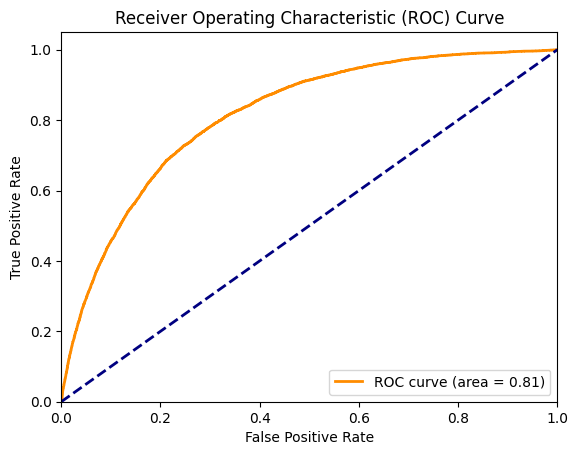

In [26]:
import matplotlib.pyplot as plt

# ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_test.numpy().flatten())
roc_auc = auc(fpr, tpr)

# Показ графика
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Линия случайного классификатора
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Многоклассовый классификатор

## Описание датасета

Согласно варианту в ходе работы используем датасет [«Оценка уровня физического развития людей разного возраста»](https://www.kaggle.com/datasets/kukuroo3/body-performance-data). В данном датасете людям выделяется 4 оценки физической активности: A,B,C,D. Именно эту оценку мы и будем предсказывать.

In [2]:
import kaggle

# Имя датасета
dataset_name = "kukuroo3/body-performance-data"

# Скачиваем и разархивируем в текущую папку
kaggle.api.dataset_download_files(dataset_name, path="./", unzip=True)


Dataset URL: https://www.kaggle.com/datasets/kukuroo3/body-performance-data


In [11]:
import pandas as pd

df = pd.read_csv('bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


Перекодируем столбец "gender" на 1/0 вместо M/F. Для этого используем label encoder.

In [12]:
from sklearn.preprocessing import LabelEncoder

print(df['gender'].unique())
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
print(df['gender'].unique())

['M' 'F']
[1 0]


Таким образом получилось, что мужской пол кодируется единичкой, а женский - нулём. 

In [13]:
from sklearn.model_selection import train_test_split

y = df['class']
X = df.drop(['class'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}\n y_train shape: {y_train.shape}\n X_test shape: {X_test.shape}\n y_test shape: {y_test.shape}')

X_train shape: (10714, 11)
 y_train shape: (10714,)
 X_test shape: (2679, 11)
 y_test shape: (2679,)


Здесь мы задаём fit у MinMaxScaler только на обучающей выборке, чтобы информация от тестовой выборки не просачилась в обучение.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)


# Регрессор

## Описание датасета

Согласно варианту в ходе работы используем датасет [«Аренда велосипедов»](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). Этот набор данных содержит почасовое и ежедневное количество арендованных велосипедов в период с 2011 по 2012 год в системе Capital bikeshare с соответствующей информацией о погоде и сезонах. В данной работе ставится задача предсказать количество арендованных велосипедов по часам.

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Загружаем датасет
bike_sharing = fetch_ucirepo(id=275)

# Преобразуем в DataFrame
df = pd.DataFrame(bike_sharing.data.features, columns=bike_sharing.metadata.features)
df['target'] = bike_sharing.data.targets  # Если есть целевая переменная

# Проверяем результат
print(df.head())


       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  target  
0  0.24  0.2879  0.81        0.0      16  
1  0.22  0.2727  0.80        0.0      40  
2  0.22  0.2727  0.80        0.0      32  
3  0.24  0.2879  0.75        0.0      13  
4  0.24  0.2879  0.75        0.0       1  


In [9]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'target'],
      dtype='object')

In [7]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

Поскольку мы не собираемся использовать модели с памятью, то удалим дату из этого набора данных

In [11]:
df.drop('dteday', axis = 1)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,target
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


Таким образом получилось, что мужской пол кодируется единичкой, а женский - нулём. 

In [14]:
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(['target'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}\n y_train shape: {y_train.shape}\n X_test shape: {X_test.shape}\n y_test shape: {y_test.shape}')

X_train shape: (13903, 13)
 y_train shape: (13903,)
 X_test shape: (3476, 13)
 y_test shape: (3476,)
